In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data = pd.read_csv('data/abalone.csv')

In [3]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
y = data['Rings']
x = data.drop('Rings', axis=1)

In [6]:
scores = []
for n in range(1, 51):
    model = RandomForestRegressor(n, random_state=1)
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(model, x, y, cv=kf, scoring='r2')
    scores.append((n, np.mean(score)))
print(sorted(scores, key=lambda x: x[1]))

[(1, 0.10213869487724367), (2, 0.33841675515802144), (3, 0.40357984946186909), (4, 0.44272239896668103), (5, 0.46402076606749693), (6, 0.47058163275877918), (7, 0.47583061635230062), (8, 0.4817418456255852), (9, 0.4883478130215681), (11, 0.4933965550001963), (10, 0.49446412480247826), (12, 0.49796587639761541), (13, 0.50213646057228534), (14, 0.50642869622573283), (15, 0.50833119704321006), (16, 0.51051314383221469), (17, 0.51384829479930283), (18, 0.51632754127394931), (20, 0.51867359287238224), (19, 0.51903468813638798), (21, 0.51983542335425015), (22, 0.52015835367222107), (23, 0.52101727093662509), (24, 0.52240318258080909), (25, 0.52261746396760711), (26, 0.52380615817170517), (27, 0.52412235221889814), (28, 0.52505374512324399), (29, 0.52597037563489313), (30, 0.52653782166757546), (31, 0.52709985443060225), (45, 0.52837546602772023), (32, 0.52838940820927838), (46, 0.52852042754934581), (47, 0.52870494457919082), (40, 0.52906701596316297), (44, 0.52911923375632508), (37, 0.52913

In [7]:
for pair in sorted(scores, key=lambda x: x[1]):
    print(pair[0], pair[1].round(2))

1 0.1
2 0.34
3 0.4
4 0.44
5 0.46
6 0.47
7 0.48
8 0.48
9 0.49
11 0.49
10 0.49
12 0.5
13 0.5
14 0.51
15 0.51
16 0.51
17 0.51
18 0.52
20 0.52
19 0.52
21 0.52
22 0.52
23 0.52
24 0.52
25 0.52
26 0.52
27 0.52
28 0.53
29 0.53
30 0.53
31 0.53
45 0.53
32 0.53
46 0.53
47 0.53
40 0.53
44 0.53
37 0.53
38 0.53
39 0.53
41 0.53
43 0.53
35 0.53
34 0.53
42 0.53
36 0.53
48 0.53
33 0.53
49 0.53
50 0.53


## Задание 2

In [8]:
data = pd.read_csv('data/gbm-data.csv')

In [9]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data['Activity'], 
                                                    test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.51s
         2           0.9192           11.12s
         3           0.8272            9.55s
         4           0.7834            8.42s
         5           0.7109            8.29s
         6           0.6368            8.74s
         7           0.5797            8.51s
         8           0.5610            7.92s
         9           0.5185            7.70s
        10           0.4984            7.39s
        20           0.1999            7.03s
        30           0.1313            6.25s
        40           0.0790            5.90s
        50           0.0511            5.58s
        60           0.0352            5.27s
        70           0.0245            4.89s
        80           0.0162            4.60s
        90           0.0114            4.29s
       100           0.0077            4.05s
       200           0.0004            1.22s


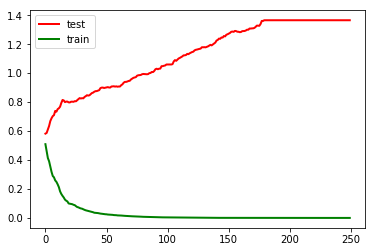

      Iter       Train Loss   Remaining Time 
         1           1.1255           13.71s
         2           1.0035           13.12s
         3           0.9386           12.39s
         4           0.8844           11.03s
         5           0.8381           10.59s
         6           0.7995            9.88s
         7           0.7559            9.43s
         8           0.7205            9.16s
         9           0.6958            8.74s
        10           0.6725            8.48s
        20           0.4672            7.12s
        30           0.3179            6.86s
        40           0.2274            6.57s
        50           0.1774            6.28s
        60           0.1394            6.02s
        70           0.1050            5.68s
        80           0.0805            5.29s
        90           0.0650            4.86s
       100           0.0511            4.54s
       200           0.0058            1.42s


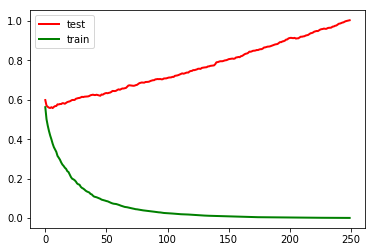

      Iter       Train Loss   Remaining Time 
         1           1.2095           10.70s
         2           1.1006           10.59s
         3           1.0240           10.87s
         4           0.9729           10.88s
         5           0.9387            9.77s
         6           0.8948            9.80s
         7           0.8621            9.36s
         8           0.8360            8.85s
         9           0.8171            8.47s
        10           0.7883            8.28s
        20           0.6164            7.09s
        30           0.4933            6.45s
        40           0.4248            5.76s
        50           0.3345            5.57s
        60           0.2760            5.24s
        70           0.2263            4.97s
        80           0.1971            4.65s
        90           0.1693            4.31s
       100           0.1388            4.14s
       200           0.0294            1.38s


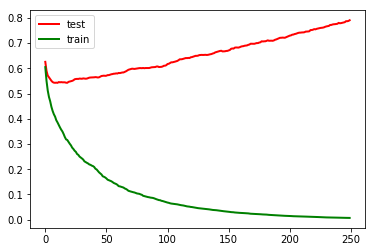

      Iter       Train Loss   Remaining Time 
         1           1.2613           12.51s
         2           1.1715           12.33s
         3           1.1009           12.35s
         4           1.0529           12.19s
         5           1.0130           11.99s
         6           0.9740           11.67s
         7           0.9475           10.76s
         8           0.9197           10.66s
         9           0.8979           10.08s
        10           0.8730            9.98s
        20           0.7207            7.61s
        30           0.6055            6.79s
        40           0.5244            6.16s
        50           0.4501            5.78s
        60           0.3908            5.39s
        70           0.3372            5.07s
        80           0.3009            4.82s
        90           0.2603            4.55s
       100           0.2327            4.21s
       200           0.0835            1.34s


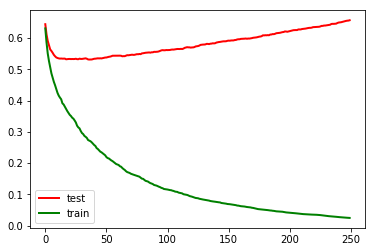

MIN = 0.531094637596885 IDX = 36
      Iter       Train Loss   Remaining Time 
         1           1.3199           10.34s
         2           1.2645           10.27s
         3           1.2170           10.34s
         4           1.1775           10.47s
         5           1.1404           10.82s
         6           1.1106           10.85s
         7           1.0844           10.98s
         8           1.0617           11.11s
         9           1.0411           11.58s
        10           1.0223           11.67s
        20           0.8864            9.75s
        30           0.7844            8.36s
        40           0.7176            7.38s
        50           0.6590            6.58s
        60           0.6120            5.98s
        70           0.5599            5.55s
        80           0.5242            5.10s
        90           0.4829            4.80s
       100           0.4473            4.45s
       200           0.2379            1.47s


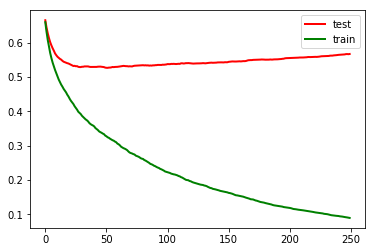

In [11]:
for n in [1, 0.5, 0.3, 0.2, 0.1]:
    model = GradientBoostingClassifier(n_estimators=250, random_state=241, verbose=True, learning_rate=n)
    model.fit(X_train, y_train)
    pred1 = model.staged_decision_function(X_train)
    pred2 = model.staged_decision_function(X_test)
    def f(y_pred):
        return 1 / (1 + np.exp(-y_pred))
    results1 = []
    for i in pred1:
        results1.append(log_loss(y_train, [f(y) for y in i]))
    results2 = []
    for i in pred2:
        results2.append(log_loss(y_test, [f(y) for y in i]))
    plt.figure()
    plt.plot(results2, 'r', linewidth=2)
    plt.plot(results1, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()
    if n == 0.2:
        print(f'MIN = {min(results2)} IDX = {results2.index(min(results2))}')

In [12]:
model = RandomForestClassifier(n_estimators=36, random_state=241)
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)
log_loss(y_test, pred).round(2)

0.54000000000000004